In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2,baselinish3

from cs231n.data_utils import load_CIFAR10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named 'cs231n.data_utils'

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


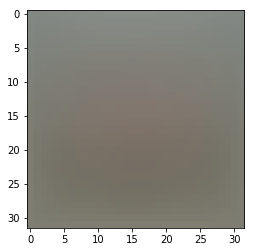

In [3]:
mean_image = np.mean(X_train, axis=0)
plt.imshow(mean_image.astype('uint8')) # visualize the mean image
plt.show()

In [11]:
mean_image = np.mean(X_train,axis = 0)
std_image = np.sqrt(np.var(X_train,axis = 0))
X_train_new = (X_train - mean_image)
print(mean_image.shape)
print (mean_image.shape)

(32, 32, 3)
(32, 32, 3)


In [4]:
def show_images(images,gray = False):   
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

In [14]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

rand_indices = np.random.choice(400,10)
sample_images = X_train[rand_indices]
samp = X_train[rand_indices]
print (sample_images.shape)
grayed_sample_images = (sample_images)
print (grayed_sample_images.shape)

feed_dict = {X:grayed_sample_images[:,:,:],Y:samp,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):  
    if(gray):
        plt.subplot(221)
        plt.imshow(images[0],cmap = plt.get_cmap('gray'))
        plt.subplot(222)
        plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        plt.subplot(223)
        plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        plt.subplot(224)
        plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images[0]);
        plt.subplot(222)
        plt.imshow(images[1])
        plt.subplot(223)
        plt.imshow(images[2])
        plt.subplot(224)
        plt.imshow(images[3])

    plt.show()
    
    
show_images((samp))
#show_images(grayed_sample_images,gray = True)
show_images((model_generated_images[0]) )

(10, 32, 32, 3)
(10, 32, 32, 3)


NameError: name 'X' is not defined

6.78625


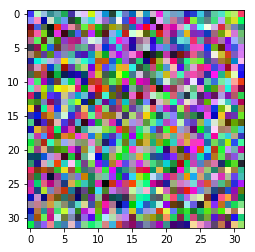

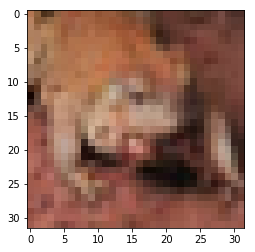

13.2972


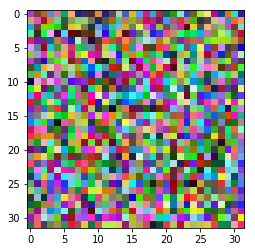

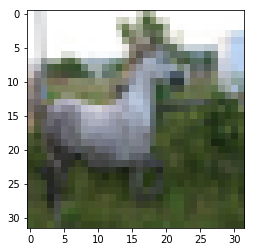

6.86055


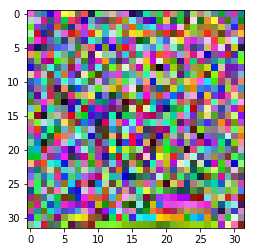

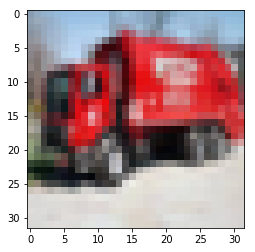

2.84071


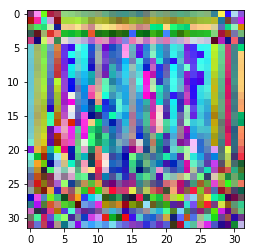

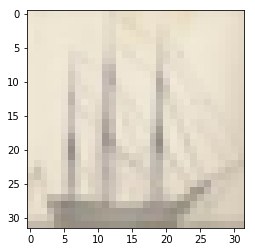

2.33475


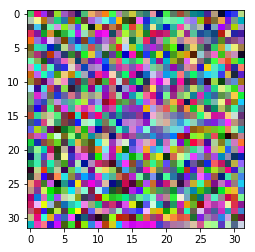

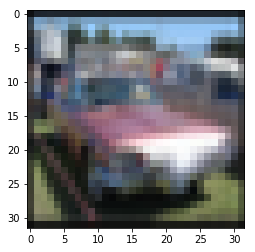

1.85702


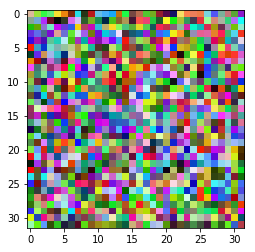

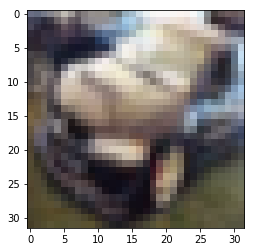

1.48641


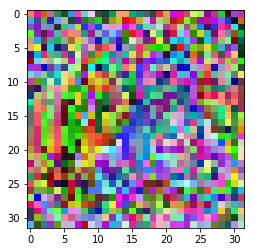

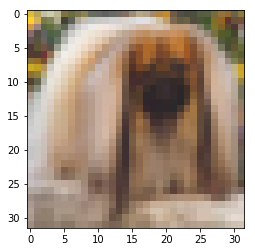

1.28155


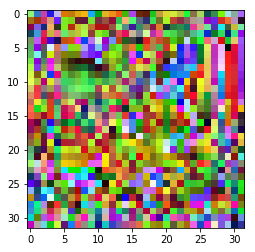

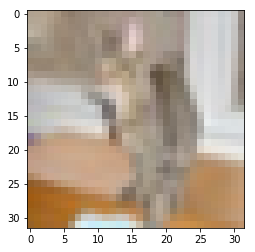

1.00868


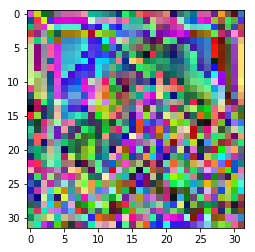

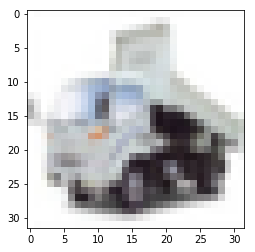

0.727551


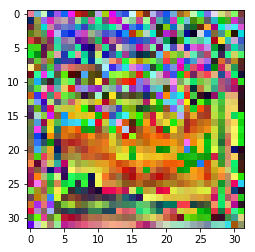

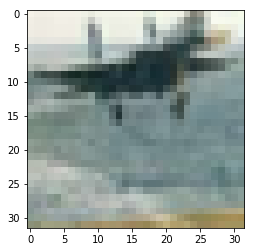

0.520136


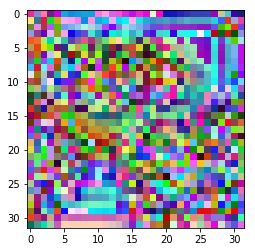

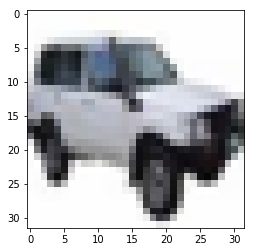

0.463767


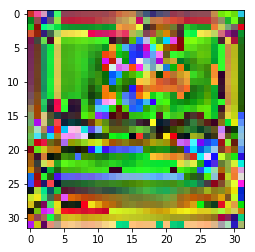

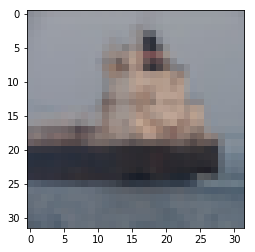

0.409078


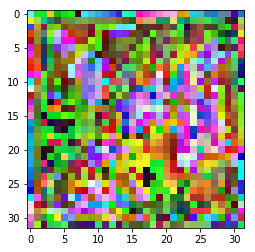

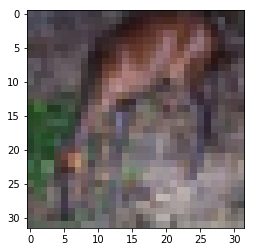

0.371232


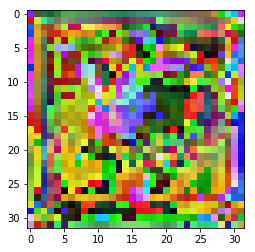

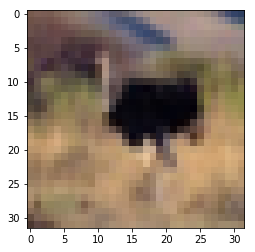

0.288667


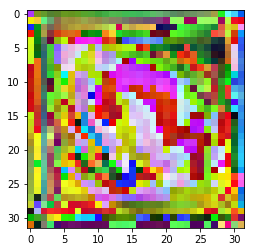

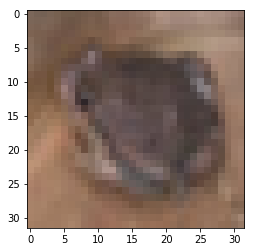

0.227233


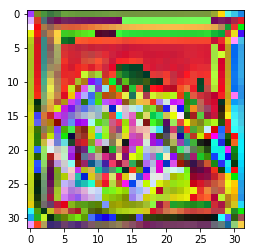

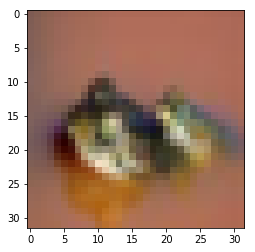

0.186922


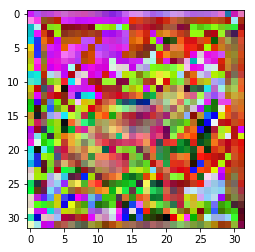

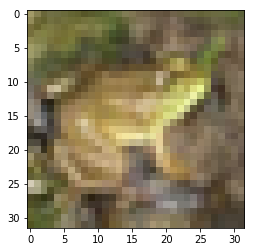

0.166878


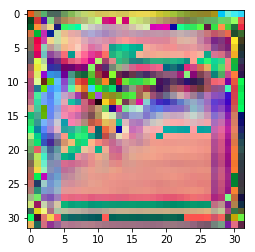

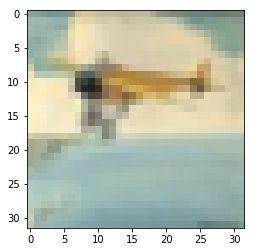

0.155752


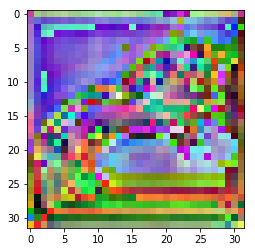

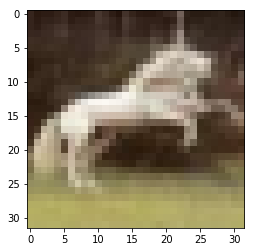

0.136388


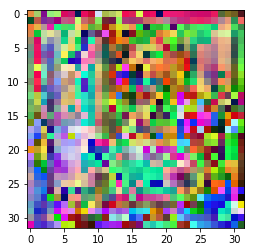

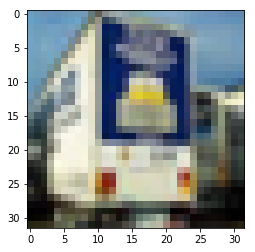

0.119096


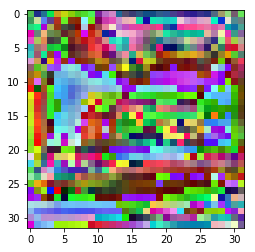

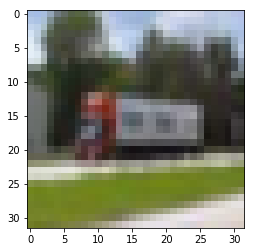

0.0905533


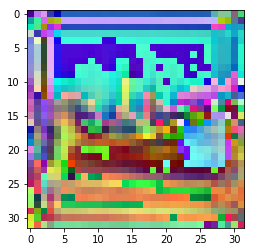

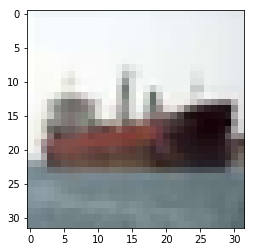

0.0757625


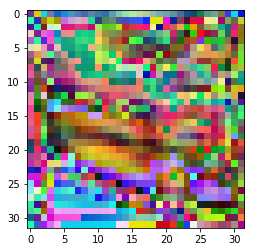

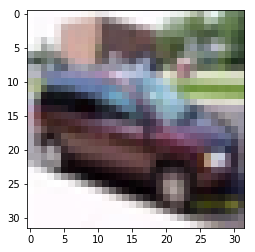

0.0787092


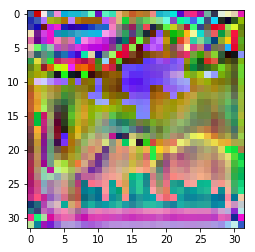

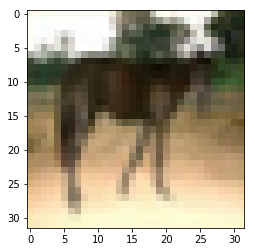

0.0791463


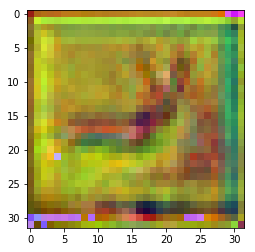

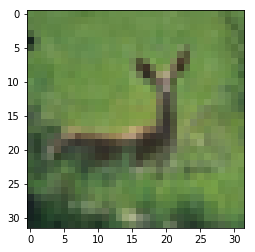

0.0748123


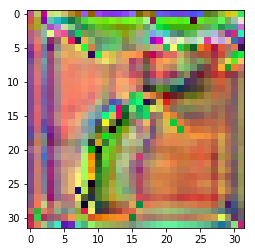

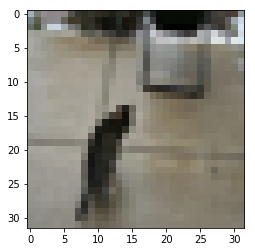

0.0627292


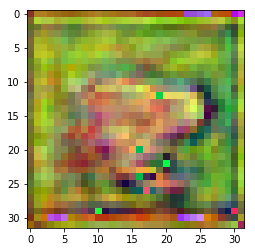

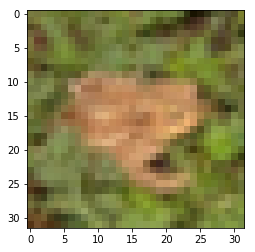

0.0556472


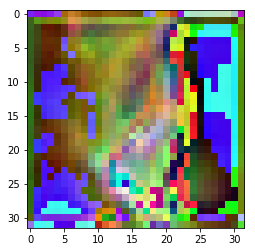

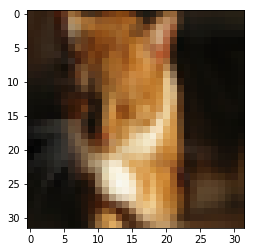

0.0515089


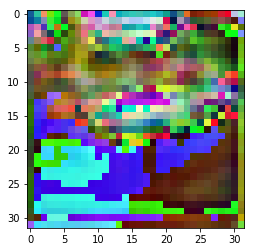

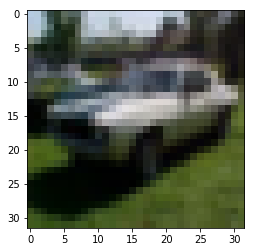

0.0524888


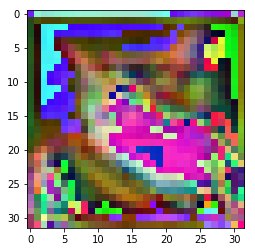

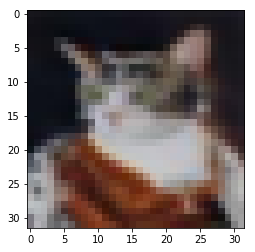

0.0605391


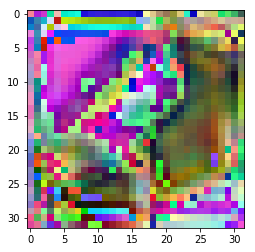

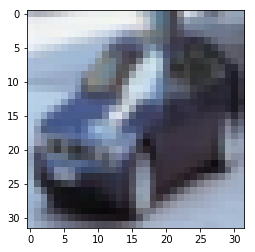

0.0494306


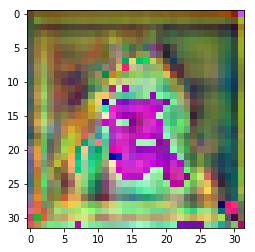

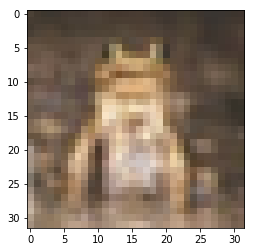

0.040029


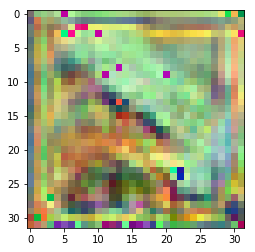

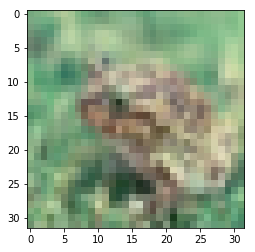

0.0401576


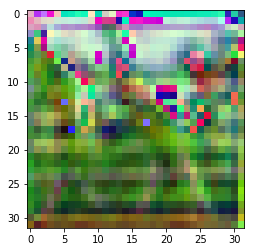

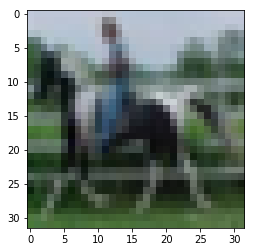

0.0419371


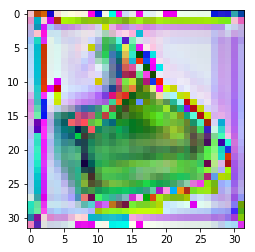

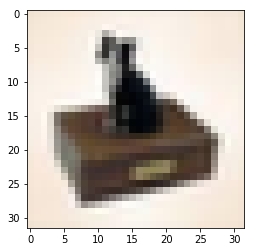

0.0432944


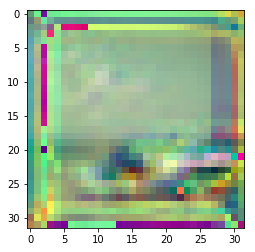

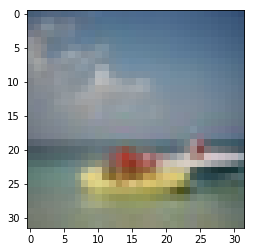

0.038696


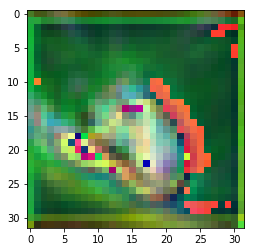

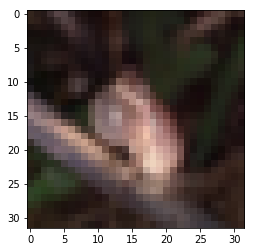

0.0369796


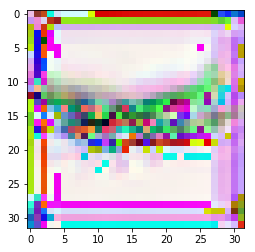

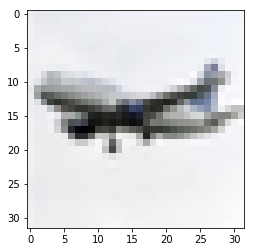

0.0359806


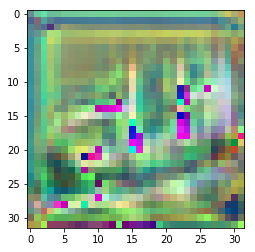

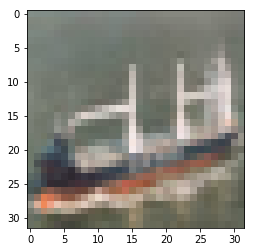

In [ ]:
tf.reset_default_graph()
Y = tf.placeholder(tf.uint8 ,[None , 32,32,3])
is_training = tf.placeholder(tf.bool)


with tf.variable_scope("model") as scope:
    hsv_out,rgb_out,hsv_in,rgb_in = baselinish3(Y,is_training)
    loss = tf.reduce_mean(tf.square(rgb_out-rgb_in))
    
    optimiser = tf.train.AdamOptimizer(3e-3)
    train_step = optimiser.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 64
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        print (losses)
        if(epoch_number % 5 == 0):
            show_images(rgb_o[5])
            show_images(rgb_i[5])

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), 
                     X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 5
for i in range(num_epochs):
    epoch_number = i
    train_epoch(X_test)
    print ("Next Epoch",i)
